In [1]:
#導入計算、繪圖工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#上傳分析檔案
data = pd.read_excel('efa.xlsx')
data.head()

,Chin,Eng,Math,Phy
0,90,92,91,90
1,95,90,96,90
2,92,87,93,92
3,98,93,99,93
4,90,88,91,90


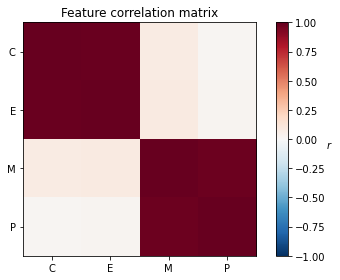

In [3]:
#計算相關係數
X=data[['Chin','Eng','Math','Phy']]
R=np.corrcoef(X.T)

#繪製相關係數熱圖

ax = plt.axes()
im = ax.imshow(R, cmap="RdBu_r", vmin=-1, vmax=1)

#X軸的標記
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list("CEMP"), rotation=0)
#Y軸的標記
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list("CEMP"))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Feature correlation matrix")
plt.tight_layout()

In [4]:
#矩陣分解，計算相關係數之特徵值
u, s, vh = np.linalg.svd(R, full_matrices=True)
s

array([2.0912585 , 1.87413518, 0.02107289, 0.01353344])

In [5]:
#計算公因子的解釋變異量
Evar=s/4
Evar

array([0.52281462, 0.46853379, 0.00526822, 0.00338336])

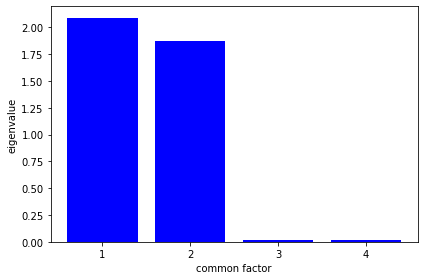

In [6]:
#繪製陡坡圖
factors=[1,2,3,4]
plt.bar(factors, s, color='blue')
plt.xlabel('common factor')
plt.ylabel('eigenvalue')
plt.xticks(factors)
plt.tight_layout()

In [11]:
#將變數資料進行標準化
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std_frame = pd.DataFrame(X_std, columns=['sX1','sX2','sX3','sX4']) 
X_std_frame.head()

,sX1,sX2,sX3,sX4
0,0.655414,1.045568,1.112059,1.082525
1,0.989141,0.912955,1.499456,1.082525
2,0.788905,0.714034,1.267018,1.233907
3,1.189377,1.111875,1.731895,1.309598
4,0.655414,0.780341,1.112059,1.082525


In [14]:
#進行因素分析，並列出因素負荷量，以對公因子命名
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components=2,rotation="varimax",random_state=0)
FA_1=FA.fit(X_std)
Aij=FA_1.components_
Aij
print('Chin=',Aij[0,0],'F1 +',Aij[1,0],'F2')
print('Eng=',Aij[0,1],'F1 +',Aij[1,1],'F2')
print('Math=',Aij[0,2],'F1 +',Aij[1,2],'F2')
print('EPhy=',Aij[0,3],'F1 +',Aij[1,3],'F2')
# ComFA=FA.fit_transform(X_std)

Chin= -0.9900345625390117 F1 + 0.07621671495953034 F2
Eng= -0.9899870761789442 F1 + 0.07049442442317945 F2
Math= -0.1597673823499621 F1 + -0.9768757614159721 F2
EPhy= -0.09522263350270582 F1 + -0.9852702347136161 F2


In [ ]:
#計算公因子分數
X_Fscore = FA.fit_transform(X_std)
X_Fscore=X_Fscore*(-1)
X_Fscore_frame = pd.DataFrame(X_Fscore, columns=['fa_1','fa_2']) 
X_Fscore_frame.head(6)

,fa_1,fa_2
0,0.920692,0.988627
1,1.045999,1.166553
2,0.840433,1.152576
3,1.261272,1.370479
4,0.792821,1.004626
5,1.047940,1.204543


In [ ]:
#合併原資料與因素分析得分
efa_outcome=pd.concat([data, X_Fscore_frame], axis=1)
efa_outcome

,Chin,Eng,Math,Phy,fa_1,fa_2
0,90,92,91,90,0.920692,0.988627
1,95,90,96,90,1.045999,1.166553
2,92,87,93,92,0.840433,1.152576
3,98,93,99,93,1.261272,1.370479
4,90,88,91,90,0.792821,1.004626
...,...,...,...,...,...,...
250,63,58,65,64,-1.234810,-0.742192
251,69,64,71,70,-0.804263,-0.334340
252,68,63,70,69,-0.876021,-0.402316
253,63,58,65,67,-1.228985,-0.628223


In [ ]:
#下載合併檔案
efa_outcome.to_excel('efa_outcome.xlsx')

# **練習題**
請利用“2019STA.xlsx”資料，將小考'Quiz',期中考'Mid_Exam',期末考'Final_Exam',等三個指標進行因素分析，說明分析結果。